In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import datetime

%matplotlib notebook

In [2]:
#load file
file = 'Data/netflix_titles.csv'
netflix_df = pd.read_csv(file)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Check for Duplicates in Title
duplicates = netflix_df.duplicated().sum()
if duplicates > 0:
    print('There are no duplicated entries.')
else:
    print(f'There are {duplicates} duplicates.')

There are 0 duplicates.


In [4]:
# Identify incomplete rows
length = len(netflix_df.index)
print(f"The number of titles is {length}")
netflix_df.count()
# The following columns contained null values, “director,” “cast,” “country,” “date_added,” “rating.”, "duration"

The number of titles is 8807


show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [5]:
# Drop all rows with missing information
na_free = netflix_df.dropna(how='any')
only_na = netflix_df[~netflix_df.index.isin(na_free.index)]
only_na

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [6]:
# Verify dropped rows
na_free.count()
# Drop or Impute ?? 
# Decide to not drop as would remove too much of the data and there are the,
# missing information is not critical to the analysis

show_id         5332
type            5332
title           5332
director        5332
cast            5332
country         5332
date_added      5332
release_year    5332
rating          5332
duration        5332
listed_in       5332
description     5332
dtype: int64

In [7]:
# verify data types in data set
na_free.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
# Change date_added to datetime format and
netflix_df["date_added"] = pd.to_datetime(netflix_df["date_added"])
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [9]:
# remove Titles added pre November 1st 2019 to match the Disney data
res = netflix_df[~(netflix_df['date_added'] < '2019-11-01')]
res

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [10]:
# count data source with dates removes
res.count()

show_id         3857
type            3857
title           3857
director        2697
cast            3532
country         3364
date_added      3847
release_year    3857
rating          3857
duration        3857
listed_in       3857
description     3857
dtype: int64

In [11]:
# count data by type
type_data = res['type'].value_counts()
type(type_data)
type_data

Movie      2632
TV Show    1225
Name: type, dtype: int64

<IPython.core.display.Javascript object>


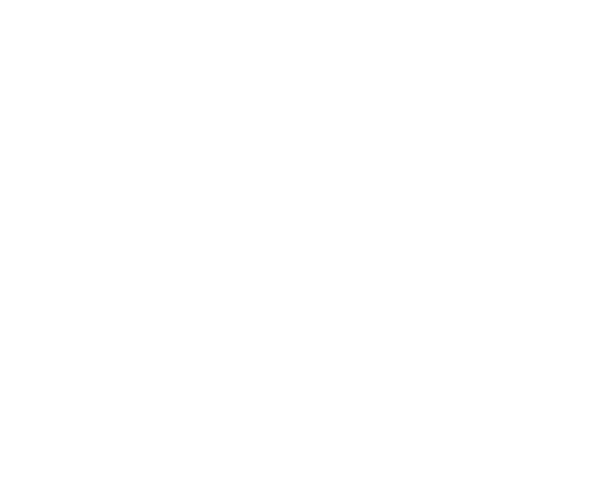

In [12]:
fig, axs = plt.subplots(1,2)

#produce a map of type
figure1 = type_data.plot(kind = "bar", figsize=(6,5),color="blue", title="Netflix shows by Type",ax=axs[0])
figure1.set_xlabel("Type")
figure1.set_ylabel("Count")
# Configure x-tick rotation
xticklabels = type_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#pie chart
figure2 = type_data.plot(kind = "pie", labels = type_data.index, figsize=(6,5),colors=['red','green'], explode = (0.1,0),autopct='%1.1f%%',shadow=True, startangle=90, title="Netflix shows by Type",ax=axs[1])
plt.axis('equal')
plt.tight_layout()

In [13]:
#map by country
country_data = res['country'].value_counts()
country_data_map = country_data.head(10)
country_data_map

United States     1242
India              369
Japan              127
United Kingdom     113
South Korea         82
Nigeria             78
Canada              63
France              55
Egypt               53
Turkey              51
Name: country, dtype: int64

In [14]:
#produce a map of type
figure3 = country_data_map.plot(kind = "barh", figsize=(6,5),color="blue", title="Netflix shows by Country")
figure3.set_xlabel("Country")
figure3.set_ylabel("Count")
# Configure x-tick rotation
yticklabels = country_data_map.index
figure3.set_yticklabels(yticklabels, rotation_mode="anchor", ha="right", wrap=True)
plt.show()
plt.tight_layout()

In [15]:
movie_df = res.loc[res['type']=='Movie',:]
movie_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Populating the interactive namespace from numpy and matplotlib


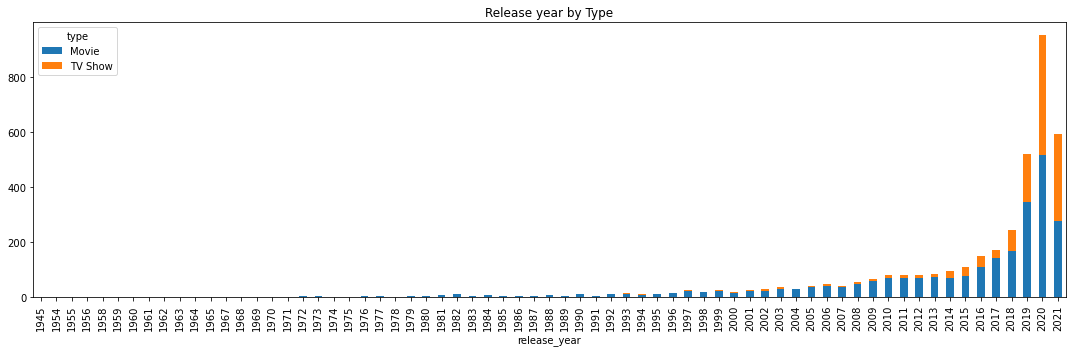

In [16]:
#map release year by type
%pylab inline
df = res.groupby(['type', 'release_year'])['release_year'].count().unstack('type').fillna(0)
df
df[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Release year by Type')
plt.tight_layout()

In [17]:
res['year_added'] = pd.DatetimeIndex(res['date_added']).year
res['month_added'] = pd.DatetimeIndex(res['date_added']).month
res['month_added'] = pd.to_datetime(res['month_added'], format='%m').dt.month_name()
res.head()

C:\Users\rober\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rober\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rober\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


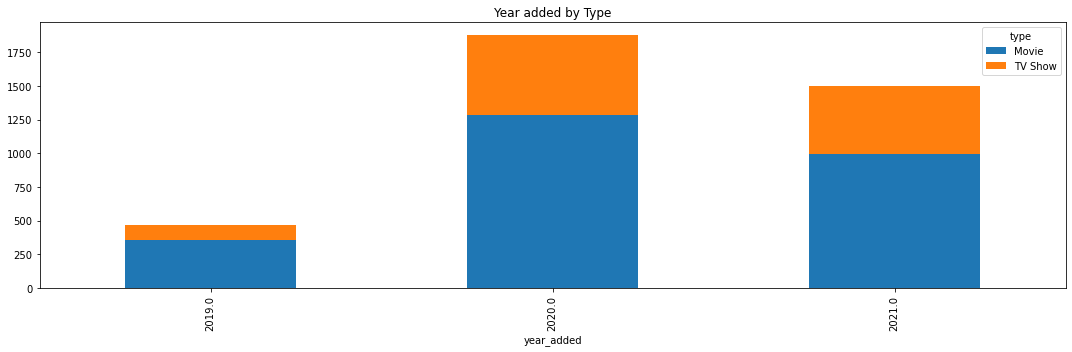

In [18]:
# graph year added by type
year_added_gb = res.groupby(['type', 'year_added'])['year_added'].count().unstack('type').fillna(0)
year_added_gb
year_added_gb[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Year added by Type')
plt.tight_layout()

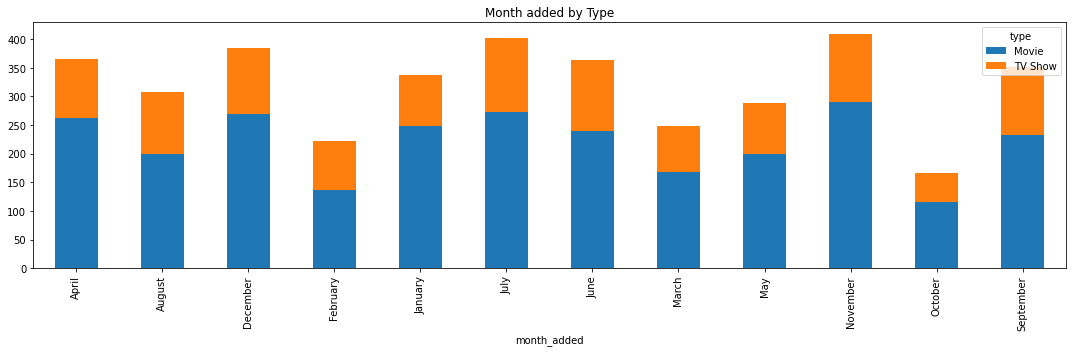

In [19]:
# graph month added by type
month_added_gb = res.groupby(['type', 'month_added'])['month_added'].count().unstack('type').fillna(0)
month_added_gb
month_added_gb[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Month added by Type')
plt.tight_layout()

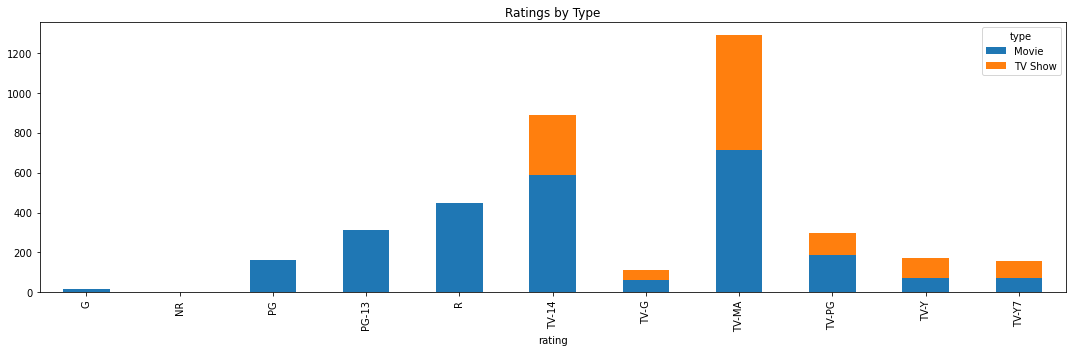

In [20]:
# graph ratings by type
rating_gb = res.groupby(['type', 'rating'])['rating'].count().unstack('type').fillna(0)
rating_gb
rating_gb[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Ratings by Type')
plt.tight_layout()

In [21]:
# duration by type - TvShows
movie_df = res.loc[res['type']=='Movie',:]
tvshow_df = res.loc[res['type']=='TV Show',:]

In [22]:
# duration by type - Movies